In [6]:
# imports
import pandas as pd

df_foursquare = pd.read_csv("../data/foursquare_features.csv")
df_yelp = pd.read_csv("../data/yelp_features.csv")
df2 = pd.read_csv("../data/dublin_city_bikes.csv")

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [7]:
df_poi = pd.merge(df_foursquare, df_yelp, on=['Latitude','Longitude'])
df_all = pd.merge(df_poi, df2, on=['Latitude','Longitude'])
df_all

,Latitude,Longitude,Average_dist_F,Average_popularity_F,Average_rating_F,Max_rating_F,Max_popularity_F,Min_rating_F,Min_popularity_F,Average_distance_Y,Average_review_count_Y,Average_rating_Y,Max_rating_Y,Max_review_count,Min_rating_Y,Min_review_count,Station Name,Number of Bikes
0,53.350230,-6.279696,618.5,0.969202,9.09,9.3,0.995915,8.9,0.923782,813.634974,21.05,4.725,5.0,97,4.5,4,GEORGES LANE,10
1,53.357841,-6.251557,824.0,0.964197,8.90,9.4,0.997029,8.7,0.897986,852.302705,28.95,4.675,5.0,106,4.5,3,NORTH CIRCULAR ROAD (O'CONNELL'S),14
2,53.356307,-6.273717,999.3,0.970233,8.98,9.4,0.998886,8.7,0.923782,834.061440,17.85,4.725,5.0,56,4.5,4,PHIBSBOROUGH ROAD,17
3,53.349562,-6.278198,584.4,0.972195,9.13,9.3,0.999257,9.0,0.923782,777.232101,16.45,4.750,5.0,50,4.5,4,SMITHFIELD NORTH,16
4,53.336021,-6.262980,709.7,0.991156,9.22,9.5,0.999829,9.1,0.958349,689.425498,29.90,4.775,5.0,165,4.5,5,CLONMEL STREET,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,53.336597,-6.248109,782.5,0.977200,9.14,9.5,0.999829,9.0,0.914641,690.606529,18.15,4.675,5.0,68,4.5,5,JAMES STREET EAST,0
110,53.353742,-6.265301,646.9,0.968302,9.09,9.4,0.995915,8.9,0.923782,625.914671,17.00,4.800,5.0,50,4.5,4,PARNELL SQUARE NORTH,0
111,53.344603,-6.263371,433.1,0.990933,9.23,9.5,0.999829,9.1,0.963005,676.468985,15.85,4.875,5.0,101,4.5,4,FOWNES STREET UPPER,16
112,53.347692,-6.278214,567.5,0.973375,9.14,9.3,0.999257,9.0,0.923782,768.840359,15.25,4.775,5.0,50,4.5,4,SMITHFIELD,21


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

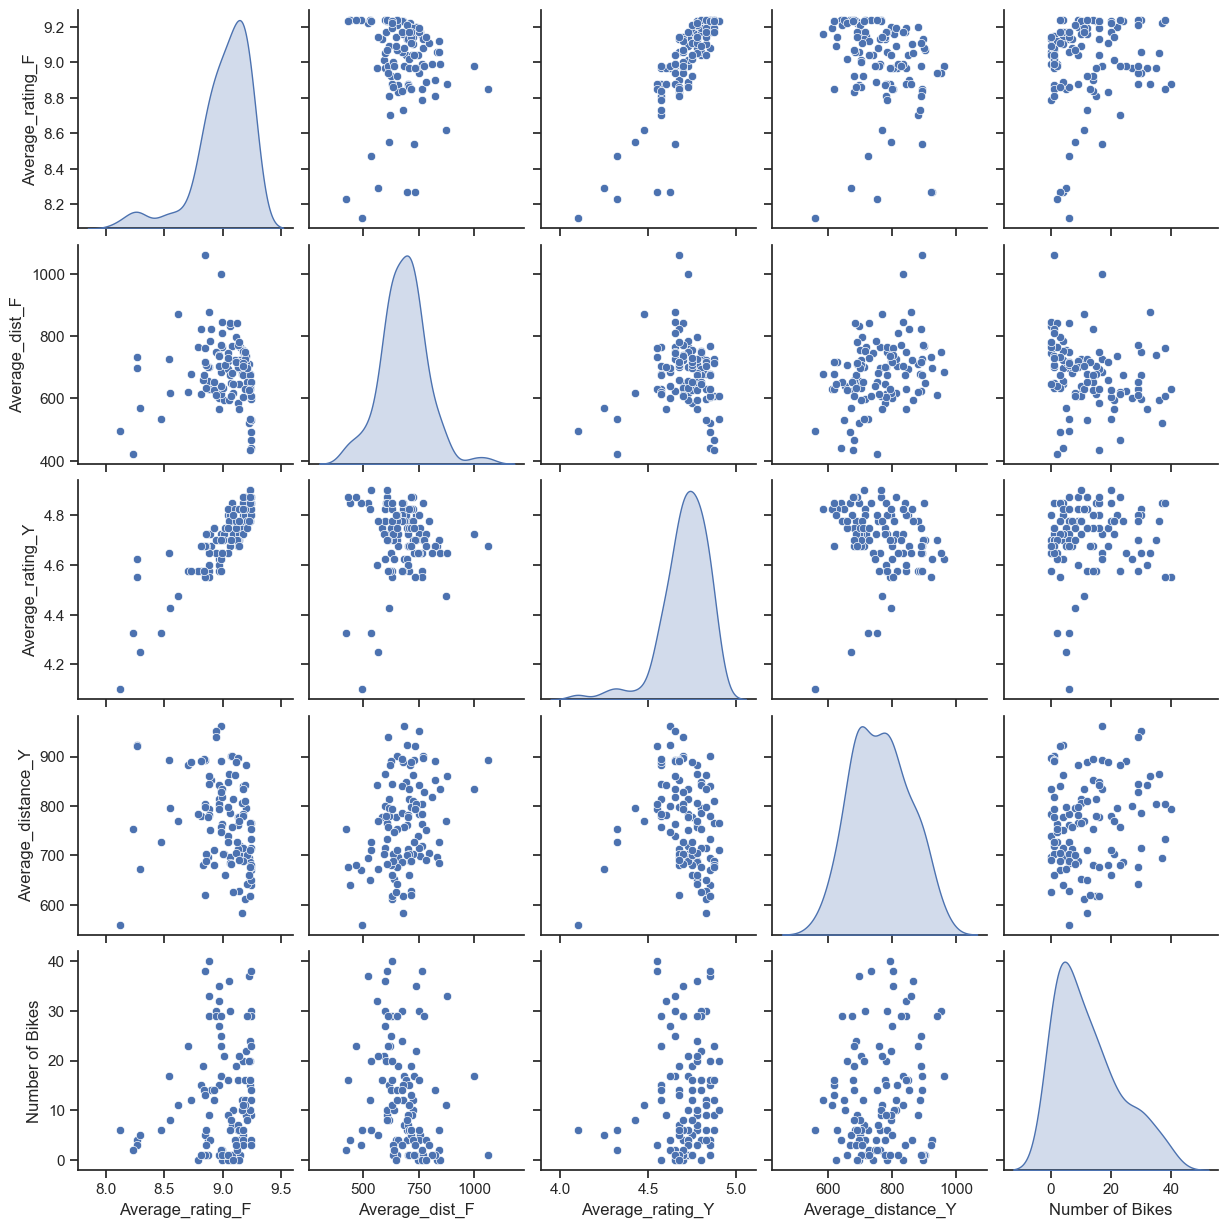

In [28]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_all, diag_kind="kde", vars=['Average_rating_F','Average_dist_F','Average_rating_Y','Average_distance_Y','Number of Bikes'])
plt.savefig('../images/pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
# plt.savefig('../images/pairplot.jpg', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [19]:
df_features = df_all[['Average_rating_F','Average_dist_F','Average_rating_Y','Average_distance_Y','Number of Bikes']]

In [29]:
# Specify the file path for the CSV
csv_file_path = "../data/features.csv"

# Save the DataFrame to CSV
df_features.to_csv(csv_file_path, index=False)

In [20]:
correlation_matrix = df_features.corr(numeric_only=True)
correlation_matrix

,Average_rating_F,Average_dist_F,Average_rating_Y,Average_distance_Y,Number of Bikes
Average_rating_F,1.000000,-0.004513,0.855557,-0.243149,0.128112
Average_dist_F,-0.004513,1.000000,0.009763,0.329463,-0.241534
Average_rating_Y,0.855557,0.009763,1.000000,-0.147352,0.075879
Average_distance_Y,-0.243149,0.329463,-0.147352,1.000000,0.146536
Number of Bikes,0.128112,-0.241534,0.075879,0.146536,1.000000


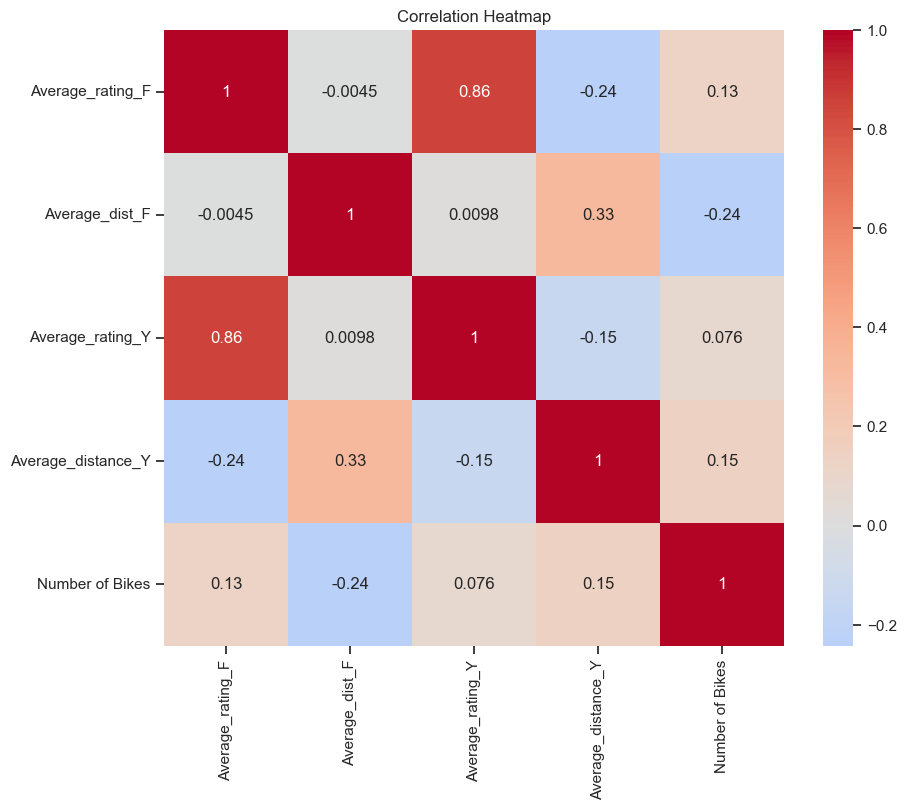

In [26]:
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title("Correlation Heatmap")
plt.savefig('../images/heatmap.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [8]:
import sqlite3
from sqlite3 import Error

In [9]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [11]:
connection = create_connection("../data/bikes_poi.sqlite")

# Write the DataFrames to the database
df_foursquare.to_sql('foursquare', connection, if_exists='replace', index=False)
df_yelp.to_sql('yelp', connection, if_exists='replace', index=False)
df2.to_sql('bikes', connection, if_exists='replace', index=False)

# Close the database connection
connection.close()

Connection to SQLite DB successful


Look at the data before and after the join to validate your data.

In [12]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [14]:
connection = create_connection("../data/bikes_poi.sqlite")

select_bikes = "SELECT * FROM bikes"
bikes = execute_read_query(connection, select_bikes)

for station in bikes:
    print(station)

connection.close()

Connection to SQLite DB successful
('GEORGES LANE', 53.35023, -6.279696, 10)
("NORTH CIRCULAR ROAD (O'CONNELL'S)", 53.357841, -6.251557, 14)
('PHIBSBOROUGH ROAD', 53.356307, -6.273717, 17)
('SMITHFIELD NORTH', 53.349562, -6.278198, 16)
('CLONMEL STREET', 53.336021, -6.26298, 9)
('AVONDALE ROAD', 53.359405, -6.276142, 17)
('MOUNT STREET LOWER', 53.33796, -6.24153, 27)
('CHRISTCHURCH PLACE', 53.343368, -6.27012, 9)
('GRANTHAM STREET', 53.334123, -6.265436, 6)
('PEARSE STREET', 53.344304, -6.250427, 9)
('YORK STREET EAST', 53.338755, -6.262003, 30)
('EXCISE WALK', 53.347777, -6.244239, 17)
('FITZWILLIAM SQUARE WEST', 53.336074, -6.252825, 1)
('PORTOBELLO ROAD', 53.330091, -6.268044, 16)
('PARNELL STREET', 53.350929, -6.265125, 12)
('FREDERICK STREET SOUTH', 53.341515, -6.256853, 37)
('CUSTOM HOUSE', 53.348279, -6.254662, 22)
('RATHDOWN ROAD', 53.35893, -6.280337, 4)
('HANOVER QUAY', 53.344115, -6.237153, 15)
('OLIVER BOND STREET', 53.343893, -6.280531, 4)
('COLLINS BARRACKS MUSEUM', 53.34